In [15]:
import pandas as pd
import numpy as np

In [16]:
# import the RPPA dataset
# clean the RPPA dataset by listing p-SHP2 levels of patients
rppa = pd.read_csv("RPPA2.csv")
rppa = rppa.transpose()
rppa = rppa.drop("Unnamed: 0")
rppa.columns=rppa.iloc[0]
rppa = rppa.drop("Composite.Element.REF")
rppa.index = [x.lower() for x in rppa.index]
rppa.index.rename("cell_type", inplace=True)
sub=rppa[["PTPN11|SHP-2_pY542","FN1|Fibronectin"]]
sub

Composite.Element.REF,PTPN11|SHP-2_pY542,FN1|Fibronectin
cell_type,,
tcga.3c.aali.01a.21.a43f.20,-0.521618,1.937218
tcga.3c.aalk.01a.21.a43f.20,-0.526931,0.242808
tcga.4h.aaak.01a.21.a43f.20,-0.370444,1.726744
tcga.5l.aat1.01a.21.a43f.20,-0.328153,-0.166293
tcga.5t.a9qa.01a.21.a43f.20,-0.701329,-0.906289
...,...,...
tcga.wt.ab41.01a.21.a43f.20,-0.177261,-0.052281
tcga.xx.a899.11a.51.a43o.20,-0.128184,0.53226
tcga.xx.a899.01a.21.a43f.20,-0.07137,-0.379777


In [17]:
# import the quantiseq results from the R code 1.
quanti = pd.read_csv("result_quantiseq.csv", index_col="cell_type").drop("Unnamed: 0",1).transpose()
quanti

C:\Users\hchen\AppData\Local\Temp/ipykernel_31736/1526547612.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  quanti = pd.read_csv("result_quantiseq.csv", index_col="cell_type").drop("Unnamed: 0",1).transpose()


cell_type,B cell,Macrophage M1,Macrophage M2,Monocyte,Neutrophil,NK cell,T cell CD4+ (non-regulatory),T cell CD8+,T cell regulatory (Tregs),Myeloid dendritic cell,uncharacterized cell
tcga.bh.a0ea.01a.21.a13c.20,0.202937,0.205333,0.012593,0.0,0.432566,0.125718,0.0,0.0,0.020854,0.000000,1.110223e-16
tcga.bh.a18h.01a.21.a13f.20,0.237603,0.687610,0.000000,0.0,0.000000,0.074787,0.0,0.0,0.000000,0.000000,2.220446e-16
tcga.c8.a1hl.01a.21.a17j.20,0.054733,0.383638,0.000000,0.0,0.518007,0.043622,0.0,0.0,0.000000,0.000000,0.000000e+00
tcga.d8.a146.01a.21.a13d.20,0.258713,0.189064,0.010984,0.0,0.430990,0.103141,0.0,0.0,0.007108,0.000000,2.220446e-16
tcga.e2.a158.01a.21.a13e.20,0.132438,0.135486,0.000000,0.0,0.355945,0.127391,0.0,0.0,0.104112,0.056090,8.853759e-02
...,...,...,...,...,...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.196758,0.375158,0.009153,0.0,0.181040,0.174135,0.0,0.0,0.063757,0.000000,2.220446e-16
tcga.e2.a1b4.01a.21.a13e.20,0.096378,0.134270,0.176374,0.0,0.256750,0.094679,0.0,0.0,0.188536,0.023231,2.978108e-02
tcga.e2.a1b5.01a.31.a13e.20,0.822114,0.058037,0.000000,0.0,0.000000,0.119848,0.0,0.0,0.000000,0.000000,4.440892e-16
tcga.e2.a1b6.01a.21.a13e.20,0.608823,0.284792,0.000000,0.0,0.000000,0.106385,0.0,0.0,0.000000,0.000000,2.220446e-16


In [18]:
#merge the quantiseq results with RPPA dataset
res=quanti.merge(sub,how='inner',left_index=True, right_index=True).astype(float)
res

,B cell,Macrophage M1,Macrophage M2,Monocyte,Neutrophil,NK cell,T cell CD4+ (non-regulatory),T cell CD8+,T cell regulatory (Tregs),Myeloid dendritic cell,uncharacterized cell,PTPN11|SHP-2_pY542,FN1|Fibronectin
tcga.bh.a0ea.01a.21.a13c.20,0.202937,0.205333,0.012593,0.0,0.432566,0.125718,0.0,0.0,0.020854,0.000000,1.110223e-16,0.171237,1.022859
tcga.bh.a18h.01a.21.a13f.20,0.237603,0.687610,0.000000,0.0,0.000000,0.074787,0.0,0.0,0.000000,0.000000,2.220446e-16,-0.130730,-0.451199
tcga.c8.a1hl.01a.21.a17j.20,0.054733,0.383638,0.000000,0.0,0.518007,0.043622,0.0,0.0,0.000000,0.000000,0.000000e+00,-0.329654,-0.602501
tcga.d8.a146.01a.21.a13d.20,0.258713,0.189064,0.010984,0.0,0.430990,0.103141,0.0,0.0,0.007108,0.000000,2.220446e-16,0.084902,0.101375
tcga.e2.a158.01a.21.a13e.20,0.132438,0.135486,0.000000,0.0,0.355945,0.127391,0.0,0.0,0.104112,0.056090,8.853759e-02,0.401267,-1.358473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.196758,0.375158,0.009153,0.0,0.181040,0.174135,0.0,0.0,0.063757,0.000000,2.220446e-16,-0.040056,0.758293
tcga.e2.a1b4.01a.21.a13e.20,0.096378,0.134270,0.176374,0.0,0.256750,0.094679,0.0,0.0,0.188536,0.023231,2.978108e-02,-0.131655,0.278222
tcga.e2.a1b5.01a.31.a13e.20,0.822114,0.058037,0.000000,0.0,0.000000,0.119848,0.0,0.0,0.000000,0.000000,4.440892e-16,-0.323479,-1.733666
tcga.e2.a1b6.01a.21.a13e.20,0.608823,0.284792,0.000000,0.0,0.000000,0.106385,0.0,0.0,0.000000,0.000000,2.220446e-16,-0.322786,-1.298980


-0.09149649509083271

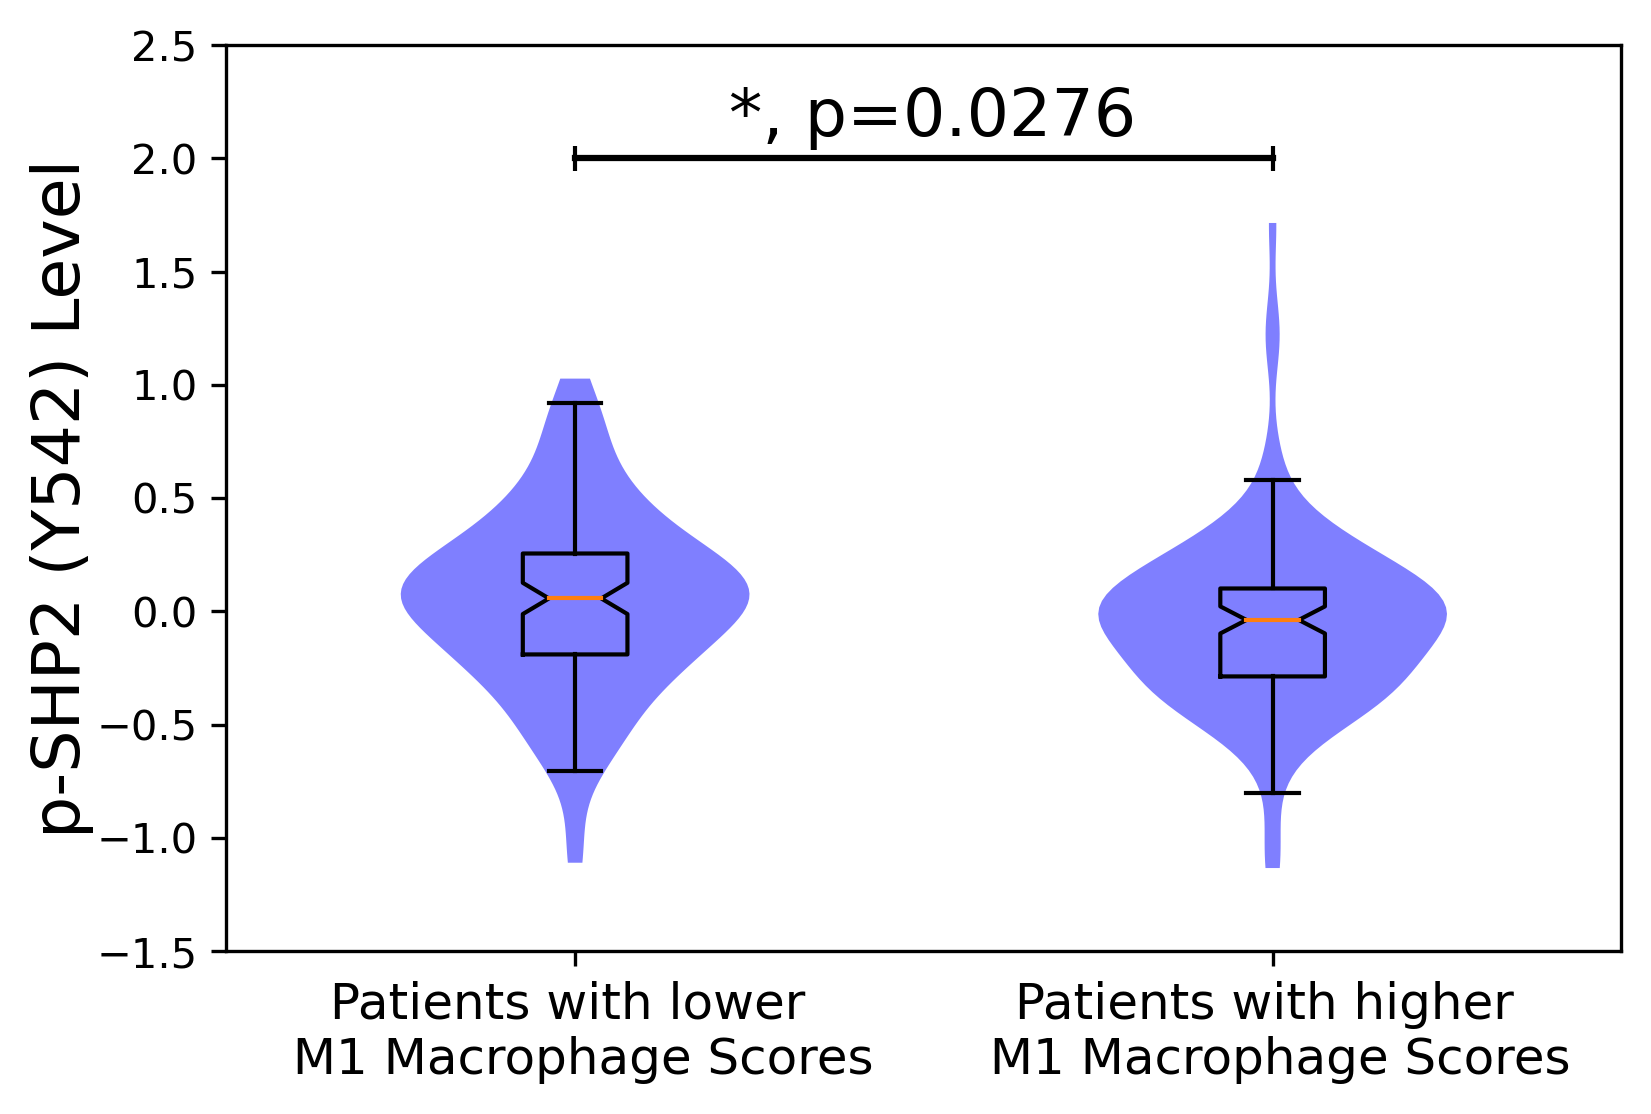

In [19]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential p-SHP2 patient groups. 
div = np.median(res["Macrophage M1"])
res2_high = res.where(res["Macrophage M1"]>=div).dropna()
res2_low = res.where(res["Macrophage M1"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11|SHP-2_pY542"],res2_high["PTPN11|SHP-2_pY542"]]
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('blue')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.ylim((-1.5,2.5))
plt.gca().annotate('*, p=0.0276',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize =16)
my_xticks = ['Patients with lower \n M1 Macrophage Scores',"Patients with higher \n M1 Macrophage Scores"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("p-SHP2 (Y542) Level",labelpad=0.5,fontsize=16)
gap=np.mean(res2_high["PTPN11|SHP-2_pY542"])-np.mean(res2_low["PTPN11|SHP-2_pY542"])
gap

0.01813128384055264

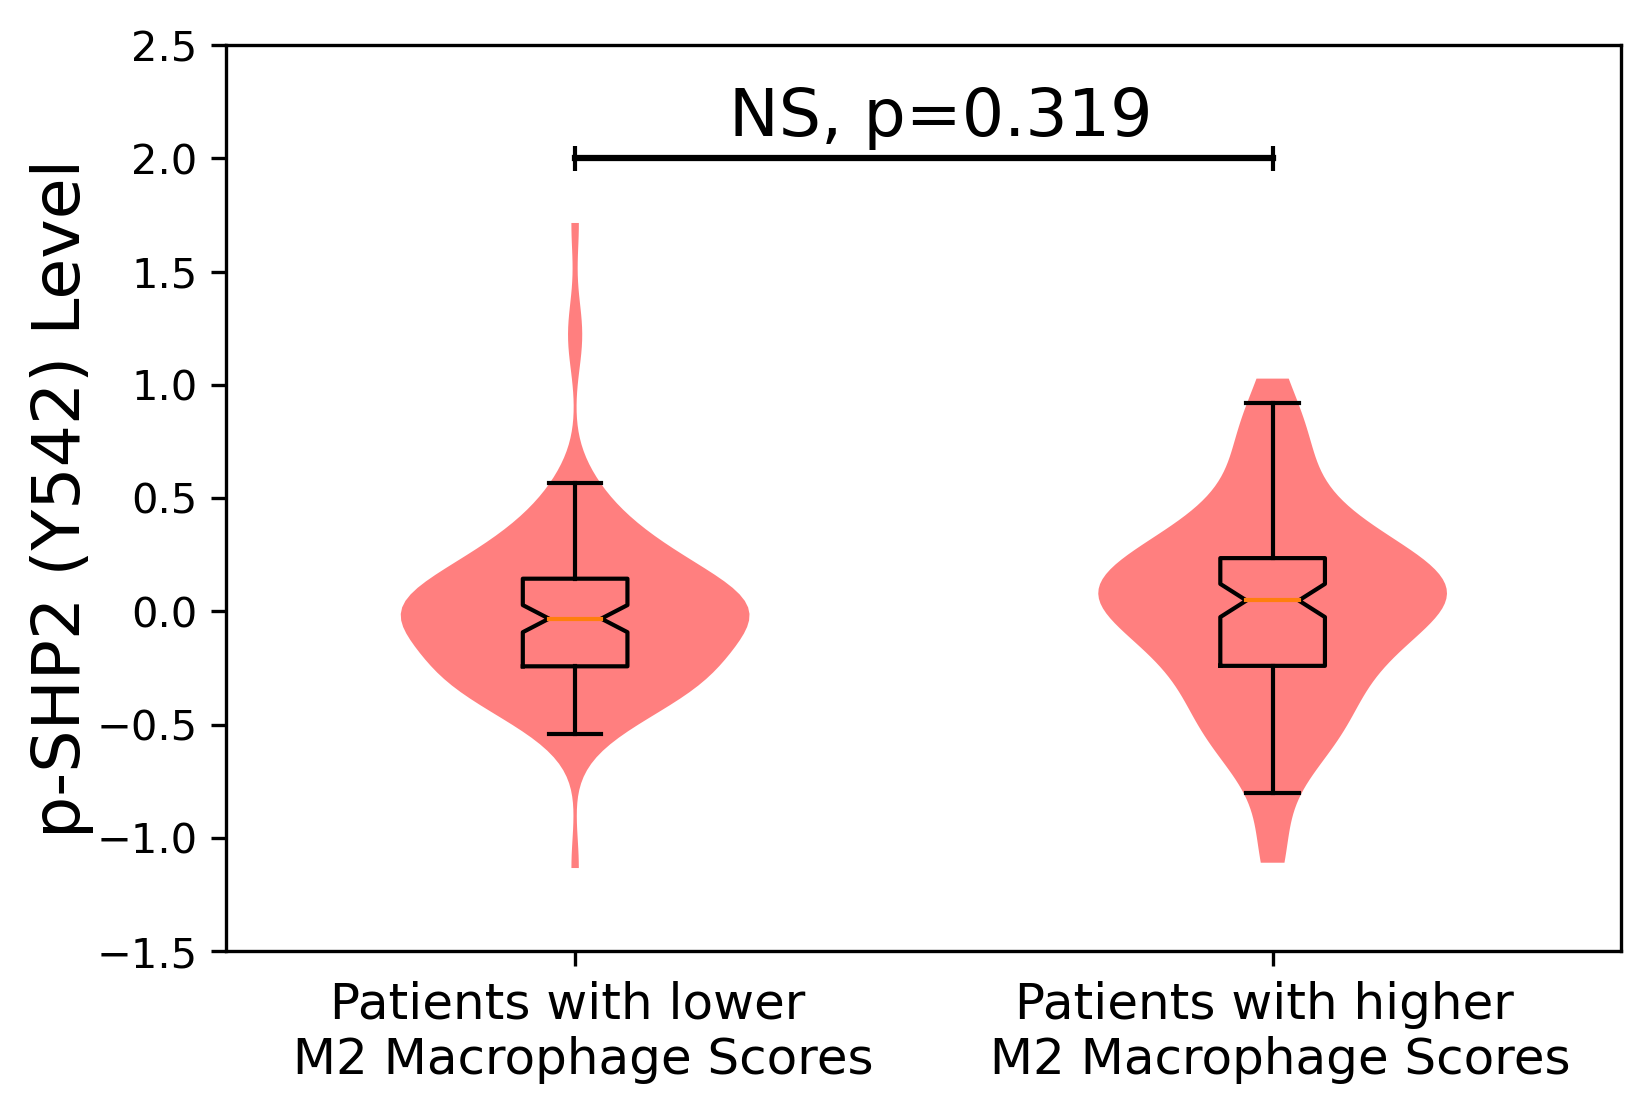

In [20]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential p-SHP2 patient groups. 
div = np.median(res["Macrophage M2"])
res2_high = res.where(res["Macrophage M2"]>=div).dropna()
res2_low = res.where(res["Macrophage M2"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11|SHP-2_pY542"],res2_high["PTPN11|SHP-2_pY542"]]
data_to_plot
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('red')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.ylim((-1.5,2.5))
plt.gca().annotate('NS, p=0.319',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize =16)
my_xticks = ['Patients with lower \n M2 Macrophage Scores',"Patients with higher \n M2 Macrophage Scores"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("p-SHP2 (Y542) Level",labelpad=0.5,fontsize=16)
gap=np.mean(res2_high["PTPN11|SHP-2_pY542"])-np.mean(res2_low["PTPN11|SHP-2_pY542"])
gap

In [21]:
# import the mRNA dataset
mRNA=pd.read_csv("mRNA_PRRA_merged.csv")
mRNA["index"]=[x.replace("-",".") for x in mRNA["Composite.Element.REF"]]
mRNA=mRNA.set_index("index")
mRNA_sub=mRNA[["PTPN11","PTPN1"]]
mRNA_sub

,PTPN11,PTPN1
index,,
tcga.bh.a0ea.01a.21.a13c.20,0.225429,0.09950
tcga.bh.a18h.01a.21.a13f.20,-0.083571,0.84250
tcga.c8.a1hl.01a.21.a17j.20,-1.137500,-1.16050
tcga.d8.a146.01a.21.a13d.20,-0.280714,0.21775
tcga.e2.a158.01a.21.a13e.20,0.422286,-0.94200
...,...,...
tcga.e2.a1b1.01a.11.a13e.20,-0.684071,-0.54025
tcga.e2.a1b4.01a.21.a13e.20,-0.411714,0.26150
tcga.e2.a1b5.01a.31.a13e.20,-0.026429,0.12600


In [22]:
# merge the quantiseq dataset with mRNA dataset
res=quanti.merge(mRNA_sub,how='inner',left_index=True, right_index=True)
res

,B cell,Macrophage M1,Macrophage M2,Monocyte,Neutrophil,NK cell,T cell CD4+ (non-regulatory),T cell CD8+,T cell regulatory (Tregs),Myeloid dendritic cell,uncharacterized cell,PTPN11,PTPN1
tcga.bh.a0ea.01a.21.a13c.20,0.202937,0.205333,0.012593,0.0,0.432566,0.125718,0.0,0.0,0.020854,0.000000,1.110223e-16,0.225429,0.09950
tcga.bh.a18h.01a.21.a13f.20,0.237603,0.687610,0.000000,0.0,0.000000,0.074787,0.0,0.0,0.000000,0.000000,2.220446e-16,-0.083571,0.84250
tcga.c8.a1hl.01a.21.a17j.20,0.054733,0.383638,0.000000,0.0,0.518007,0.043622,0.0,0.0,0.000000,0.000000,0.000000e+00,-1.137500,-1.16050
tcga.d8.a146.01a.21.a13d.20,0.258713,0.189064,0.010984,0.0,0.430990,0.103141,0.0,0.0,0.007108,0.000000,2.220446e-16,-0.280714,0.21775
tcga.e2.a158.01a.21.a13e.20,0.132438,0.135486,0.000000,0.0,0.355945,0.127391,0.0,0.0,0.104112,0.056090,8.853759e-02,0.422286,-0.94200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga.e2.a1b1.01a.11.a13e.20,0.196758,0.375158,0.009153,0.0,0.181040,0.174135,0.0,0.0,0.063757,0.000000,2.220446e-16,-0.684071,-0.54025
tcga.e2.a1b4.01a.21.a13e.20,0.096378,0.134270,0.176374,0.0,0.256750,0.094679,0.0,0.0,0.188536,0.023231,2.978108e-02,-0.411714,0.26150
tcga.e2.a1b5.01a.31.a13e.20,0.822114,0.058037,0.000000,0.0,0.000000,0.119848,0.0,0.0,0.000000,0.000000,4.440892e-16,-0.026429,0.12600
tcga.e2.a1b6.01a.21.a13e.20,0.608823,0.284792,0.000000,0.0,0.000000,0.106385,0.0,0.0,0.000000,0.000000,2.220446e-16,-0.442071,0.08625


0.062058070128827476

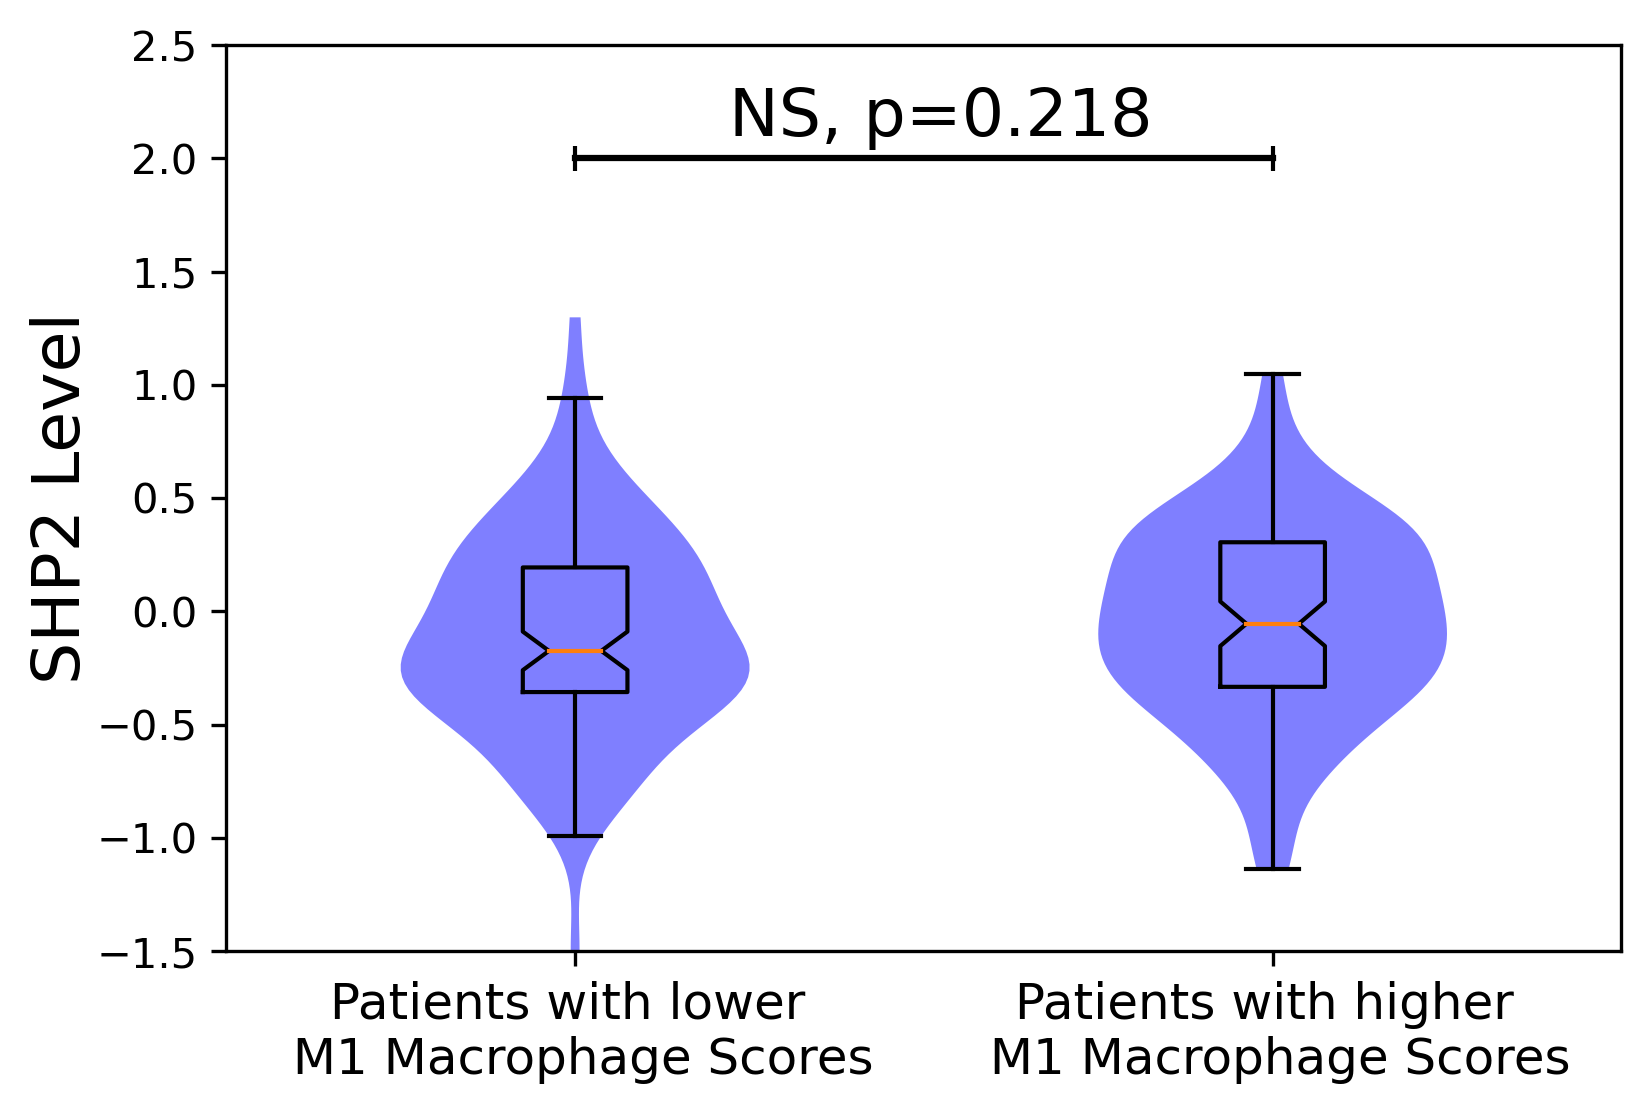

In [23]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential SHP2 patient groups. 
div = np.median(res["Macrophage M1"])
res2_high = res.where(res["Macrophage M1"]>=div).dropna()
res2_low = res.where(res["Macrophage M1"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11"],res2_high["PTPN11"]]
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('blue')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.ylim((-1.5,2.5))
plt.gca().annotate('NS, p=0.218',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize =16)
my_xticks = ['Patients with lower \n M1 Macrophage Scores',"Patients with higher \n M1 Macrophage Scores"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("SHP2 Level",labelpad=0.5,fontsize=16)
gap=np.mean(res2_high["PTPN11"])-np.mean(res2_low["PTPN11"])
gap

-0.09396753141159449

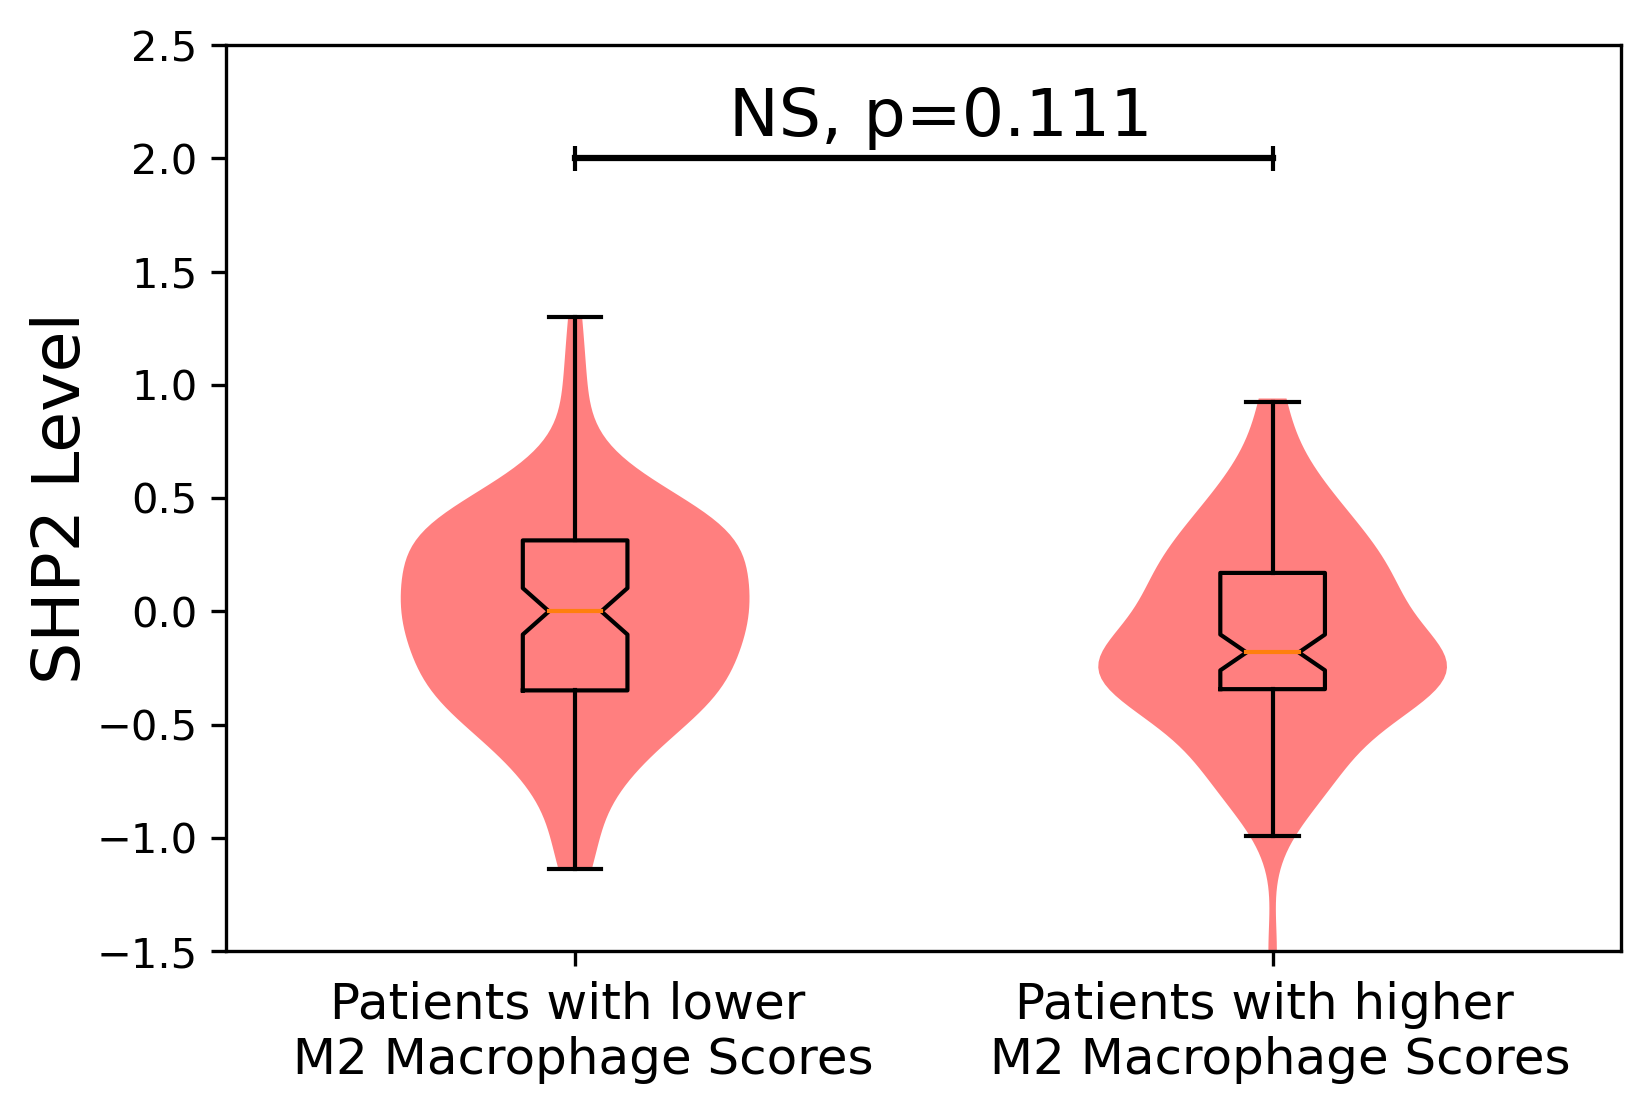

In [24]:
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
# plot the viloin plot of immune scores in differential SHP2 patient groups. 
div = np.median(res["Macrophage M2"])
res2_high = res.where(res["Macrophage M2"]>=div).dropna()
res2_low = res.where(res["Macrophage M2"]<div).dropna()
res2_low=res2_low.astype(float)
res2_high=res2_high.astype(float)
data_to_plot=[res2_low["PTPN11"],res2_high["PTPN11"]]
data_to_plot
plt.figure(dpi=300)
fig=plt.violinplot(data_to_plot,[1,2],showmeans=False, showextrema=False)
for pc in fig['bodies']:
    pc.set_facecolor('red')
    pc.set_alpha(0.5)
plt.boxplot(data_to_plot, notch=True, sym="",whis=1.5)
plt.plot([1,2],[2,2],"-|", color="black")
plt.ylim((-1.5,2.5))
plt.gca().annotate('NS, p=0.111',
            xy=(1.5, 2), xycoords='data',
            xytext=(0.36, 0.9), textcoords='axes fraction',fontsize =16)
my_xticks = ['Patients with lower \n M2 Macrophage Scores',"Patients with higher \n M2 Macrophage Scores"]
plt.xticks([1,2], my_xticks,fontsize=12)
plt.ylabel("SHP2 Level",labelpad=0.5,fontsize=16)
gap=np.mean(res2_high["PTPN11"])-np.mean(res2_low["PTPN11"])
gap